In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io #For loadmat

# Agglomerative 

In [2]:
#Function to load matlab file.
def parse_file(name):
    data = scipy.io.loadmat(name) #Parse the matlab file into dictionary
    return data

In [3]:
#Plotting the data
def plot_data(X, cluster_centers = None):
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    for p in X:
            ax.plot(p[0],p[1], "b.")
    try:
        for c in cluster_centers:
                ax.scatter(c[0],c[1], s=80, marker = 'o')
    except TypeError:
        pass
    ax.legend() #Display the lengend
    ax.grid() #Display the grid
    return(fig, ax)

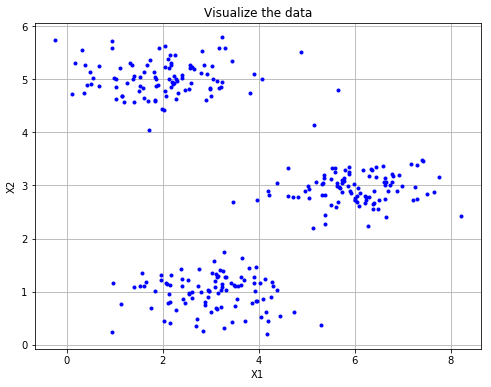

In [4]:
data = parse_file("ex7data2.mat")
fig, ax = plot_data(data['X'])
ax.set_title("Visualize the data")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
fig.show()

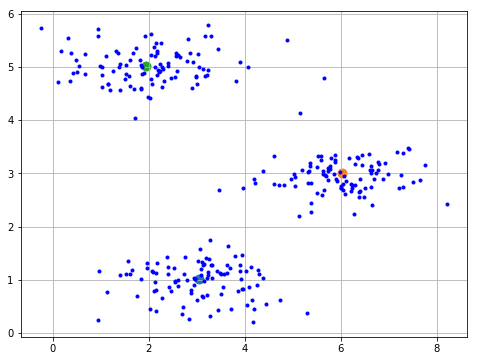

In [5]:
#Run preliminary analysis with Sklearn's module
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state = 0).fit(data['X'])
fig, ax = plot_data(data['X'], kmeans.cluster_centers_)
fig.show()

In [6]:
#Creating my own k-means module
class Kmeans():
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def fit(self, data):
        #Define the data
        self.data = data
        self.num_points = data.shape[0]
        self.features = data.shape[1]
        
        #Initialize some random centers.
        #We want to start within the dataset to minimize travel
        #In this module, we simply select from the random distribution
        self.mean = np.mean(self.data, axis = 0)
        self.std = np.std(self.data, axis = 0)
        self.centers = np.random.randn(self.n_clusters,self.features)*self.std + self.mean
        self.fig, self.ax = self.__plot_data(self.data, self.centers)
        self.fig.show()
        #return(data)
    
    #Function to plot the data
    def __plot_data(self, X, cluster_centers = None):
        fig, ax = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(8)
        for p in X:
                ax.plot(p[0],p[1], "b.")
        try:
            for c in cluster_centers:
                    ax.scatter(c[0],c[1], s=80, marker = 'o')
        except TypeError:
            pass
        ax.legend() #Display the lengend
        ax.grid() #Display the grid
        return(fig, ax)
        

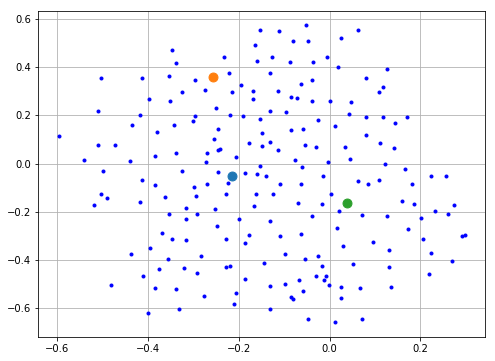

In [10]:
kmeans = Kmeans(n_clusters = 3)
kmeans.fit(data['X'])

dict_keys(['__header__', '__version__', 'Xval', 'X', '__globals__', 'yval', 'y'])

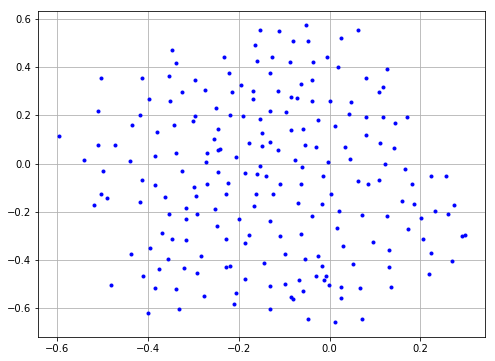

In [8]:
data = parse_file("ex6data3.mat")
plot_data(data['X'])
data.keys()